In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [6]:
file_1 = '대한민국 도시별 기후.csv'

In [7]:
df1 = pd.read_csv(file_1, encoding = 'UTF-8')

In [8]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강릉,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강릉,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강릉,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강릉,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강릉,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [9]:
df1.tail()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
10283,184,제주,2023-03,12.3,16.4,8.5,49.6,2.7,8.8,66,26,211.1,56.84
10284,184,제주,2023-04,15.5,19.4,11.8,62.1,3.6,14.0,69,14,204.1,52.27
10285,184,제주,2023-05,19.1,23.1,16.0,269.3,2.7,8.7,77,28,180.3,41.87
10286,184,제주,2023-06,23.4,26.7,20.4,213.0,3.1,10.9,76,29,170.2,39.51
10287,184,제주,2023-07,28.1,31.4,25.6,273.2,3.0,10.8,75,39,124.6,28.43


In [10]:
df1['지점명'].value_counts()

지점명
강릉    643
서울    643
인천    643
수원    643
서산    643
청주    643
대전    643
포항    643
군산    643
대구    643
울산    643
광주    643
부산    643
통영    643
여수    643
제주    643
Name: count, dtype: int64

In [11]:
def change_local(string):
    if '강릉' == string:
        return '강원특별자치도'
    elif '서울' == string:
        return '서울특별시'
    elif '제주' == string:
        return '제주도'
    elif '여수' == string:
        return '전라남도'
    elif '부산' == string:
        return '부산광역시'
    elif '광주' == string:
        return '광주광역시'
    elif '울산' == string:
        return '울산광역시'
    elif '대구' == string:
        return '대구광역시'
    elif '인천' == string:
        return '인천광역시'
    elif '수원' == string:
        return '경기도'
    elif '서산' == string:
        return '충청남도'
    elif '청주' == string:
        return '충청북도'
    elif '대전' == string:
        return '대전광역시'
    elif '포항' == string:
        return '경상북도'
    elif '군산' == string:
        return '전라북도'
    else:
        return '경상남도'

In [12]:
df1['지점명'] = df1['지점명'].apply(change_local)

In [13]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강원특별자치도,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강원특별자치도,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강원특별자치도,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강원특별자치도,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강원특별자치도,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [14]:
def check_year(df):
    return int(df[:4])

In [15]:
df1['year'] = df1['일시'].apply(check_year)

In [16]:
df1.to_csv('대한민국_시도별_기후.csv')

In [17]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%),year
0,105,강원특별자치도,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18,1970
1,105,강원특별자치도,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52,1970
2,105,강원특별자치도,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01,1970
3,105,강원특별자치도,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71,1970
4,105,강원특별자치도,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01,1970


In [20]:
df1.drop(['지점'], axis = 1, inplace = True)

In [33]:
df1_g1 = df1.drop(['일시'], axis = 1)

In [35]:
df_g1 = df1_g1.groupby(['지점명', 'year']).mean()
df_g1.head()

평균기온(℃)  평균최고\n기온(℃)  평균최저\n기온(℃)     강수량(mm)  평균풍속\n(m/s)  \
지점명     year                                                                 
강원특별자치도 1970  12.083333    16.583333     8.200000  115.616667     3.050000   
        1971  12.250000    16.708333     8.533333  117.933333     3.175000   
        1972  12.583333    17.175000     8.700000  125.800000     2.925000   
        1973  12.850000    17.308333     8.966667   83.708333     2.983333   
        1974  11.608333    15.991667     7.800000  101.691667     2.825000   

              최대풍속\n(m/s)  평균습도(%rh)  최저습도(%rh)     일조합(hr)     일조율(%)  
지점명     year                                                            
강원특별자치도 1970    12.000000  65.666667  25.083333  174.683333  49.227500  
        1971    12.666667  63.583333  25.833333  194.000000  54.279167  
        1972    13.300000  65.166667  23.250000  175.641667  47.235000  
        1973    13.700000  62.833333  25.250000  194.858333  53.728333  
        1974    13.225000  64.166667  23.333333  181.866667  50.429167

In [38]:
df_g1 = df_g1.reset_index()
df_g1

,index,지점명,year,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,0,강원특별자치도,1970,12.083333,16.583333,8.200000,115.616667,3.050000,12.000000,65.666667,25.083333,174.683333,49.227500
1,1,강원특별자치도,1971,12.250000,16.708333,8.533333,117.933333,3.175000,12.666667,63.583333,25.833333,194.000000,54.279167
2,2,강원특별자치도,1972,12.583333,17.175000,8.700000,125.800000,2.925000,13.300000,65.166667,23.250000,175.641667,47.235000
3,3,강원특별자치도,1973,12.850000,17.308333,8.966667,83.708333,2.983333,13.700000,62.833333,25.250000,194.858333,53.728333
4,4,강원특별자치도,1974,11.608333,15.991667,7.800000,101.691667,2.825000,13.225000,64.166667,23.333333,181.866667,50.429167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,859,충청북도,2019,14.183333,19.316667,9.675000,71.391667,1.300000,5.700000,61.166667,19.666667,202.683333,55.290000
860,860,충청북도,2020,13.941667,18.891667,9.700000,113.216667,1.458333,6.300000,62.916667,20.583333,193.325000,52.940000
861,861,충청북도,2021,14.350000,19.333333,9.916667,83.466667,1.450000,6.475000,62.500000,21.666667,197.683333,54.182500
862,862,충청북도,2022,13.908333,19.033333,9.433333,103.033333,1.391667,5.658333,59.500000,15.166667,211.308333,57.811667


Text(0.5, 1.0, '국내 연도별 평균기온(℃) 수치')

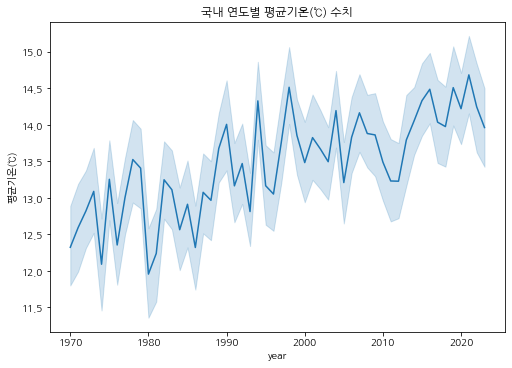

In [68]:
fig, axes = plt.subplots(figsize = (7,5),  layout = 'constrained')
sns.lineplot(data = df_g1, x = 'year', y = '평균기온(℃)', ax = axes)
axes.set_title('국내 연도별 평균기온(℃) 수치')

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


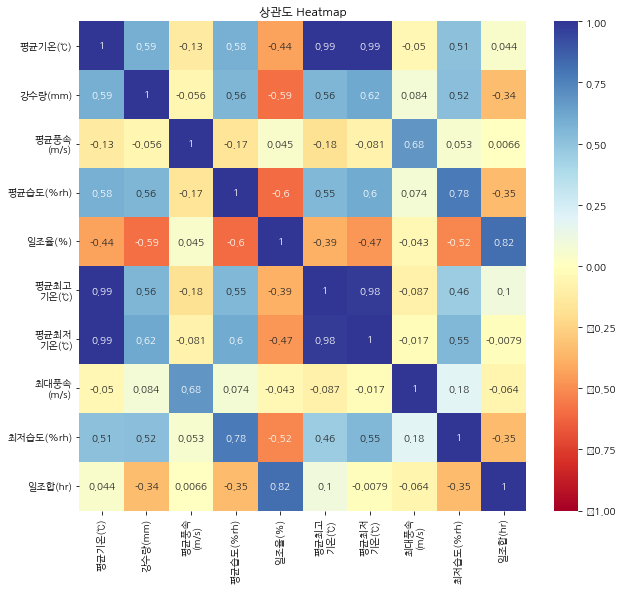

In [84]:
# 상관도를 보기위해 heatmap 
fig, axe = plt.subplots(figsize=(10,9))
axe = sns.heatmap(df1[['평균기온(℃)', '강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)', '평균최고\n기온(℃)', '평균최저\n기온(℃)', '최대풍속\n(m/s)', '최저습도(%rh)', '일조합(hr)']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# (강수량, 평균풍속, 평균습도, 일조율)를 집중적으로 보자

In [90]:
# 각 col별 평균기온과 상관관계 비교 (일시, 강수량, 평균풍속, 평균습도, 일조율)
df3 = df1.iloc[:, 1:-1]

In [91]:
# (일시, 강수량, 평균풍속, 평균습도, 일조율) 빼고 다 drop
df3.drop(['평균최고\n기온(℃)', '평균최저\n기온(℃)', '최대풍속\n(m/s)', '최저습도(%rh)', '일조합(hr)'], axis = 1, inplace = True)

In [94]:
# 일시를 float화 진행
def change_day(df):
    return float(df.replace('-', '.'))

df3['날짜'] = df3['일시'].apply(change_day)

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


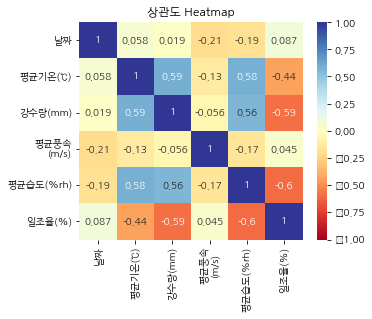

In [97]:
fig, axe = plt.subplots(figsize=(5,4))
axe = sns.heatmap(df3[['날짜', '평균기온(℃)', '강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# 그렇게 큰 상관도를 보여주지는 않는다.

In [140]:
df1.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         5 non-null      object 
 1   일시          5 non-null      object 
 2   평균기온(℃)     5 non-null      float64
 3   평균최고
기온(℃)  5 non-null      float64
 4   평균최저
기온(℃)  5 non-null      float64
 5   강수량(mm)     5 non-null      float64
 6   평균풍속
(m/s)  5 non-null      float64
 7   최대풍속
(m/s)  5 non-null      float64
 8   평균습도(%rh)   5 non-null      int64  
 9   최저습도(%rh)   5 non-null      int64  
 10  일조합(hr)     5 non-null      float64
 11  일조율(%)      5 non-null      float64
 12  year        5 non-null      int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 648.0+ bytes


In [141]:
# 1970년도 ~ 2000년도를 기준으로 선형모델 생성 후 예측 값 비교
x = np.array(df1.iloc[:, -1])
print(type(x))
X = x[:, np.newaxis]
X.shape

y = df1.iloc[:, 2]

<class 'numpy.ndarray'>


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [143]:
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.5), 
          Lasso(alpha = 0.5), LinearRegression()]:
    m.fit(X_train, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('=================================================')
    print('')

[-2.2822931e+11]
[3.13954782e+09]
train score :  -2.576985194205022e+27
test score :  -2.6371649341002986e+27

[0.02754493]
-41.574112617240125
train score :  0.0022483327200648606
test score :  0.0059277607804496535

[0.02545056]
-37.39295028193394
train score :  0.002235334401603839
test score :  0.0056239742215615784

[0.02754494]
-41.574127543398205
train score :  0.0022483327200648606
test score :  0.005927761816964305

